In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cluster, metrics
import gensim
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn import metrics
#from sklearn import preprocessingcount
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore', category=Warning)

from IPython.display import Audio 
from IPython.core.display import display
def mFinito():
       display(Audio('/Users/rogerrabbit/Downloads/here-we-go-mario.mp3', autoplay=True))

def _df_(x):
    return pd.DataFrame(x)


from collections import Counter

def _count(x):
    a = Counter(" ".join(x).split()).most_common(10000)
    a = _df_(a)
    return a

def _count_(x):
    a = Counter(" ".join(x).split()).most_common(10000)
    return a

def _graph_histo_(data,x,y, title, figsize, font):
    plt.figure(figsize=(figsize, figsize))
    sns.set(font_scale=font)
    ax = sns.barplot(x=x, y=y, data=a, orient='h', saturation=0.7)
    plt.xticks(rotation=80)
    plt.title(str(title), fontsize=35)
    return plt.show()


from tqdm import tqdm
import cv2


from sklearn import cluster, metrics

import time
tempsX = time.time()
def _time_():
    duration1 = time.time()-tempsX
    return print("temps de traitement       ",round(duration1/60,2), "minutes")

/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Import

In [2]:
mD= pd.read_csv('flipkart.csv')
mData = mD.copy()
mData.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{, {""key""=>""Model N..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."


# Clean & Prépare 

In [3]:
for i in range (0,7):
    mData['p_cat_%d' % i] = mData.product_category_tree.str.split('>>', expand = True)[i]

    
mData_p1 = mData[["p_cat_0","p_cat_1", "image", "description"]]

temp=mData_p1.p_cat_0.fillna("0")

mData_p1['Category'] =  pd.np.where(temp.str.contains("Home Furnishing"),"Home_Furnishing",
                        pd.np.where(temp.str.contains("Home Decor & Festive Needs"), "Home_Decor_Festive_Needs",
                        pd.np.where(temp.str.contains("Kitchen & Dining"), "Kitchen_Dining",
                        pd.np.where(temp.str.contains("Baby Care"), "Baby_Care",
                        pd.np.where(temp.str.contains("Computers"), "Computers",
                        pd.np.where(temp.str.contains("Beauty and Personal Care"), "Beauty_Personal_Care",
                        pd.np.where(temp.str.contains("Watches"), "Watches", "task")))))))

mData_p1 = mData_p1.rename(columns={"p_cat_1": "Product"})
mData_p1.Product = mData_p1.Product.str.split('"]', expand = True)[0]
mData_p1.pop('p_cat_0')
mData_p1["labels"] = LabelEncoder().fit_transform(mData_p1['Category'])

mData_p1 = mData_p1.drop(635)
mData_p1 = mData_p1.reset_index()

# Import Img

In [4]:
list_image_path = np.unique(mData_p1.image.to_numpy())
list_image_path

sift_keypoints = []
_for_target = []

sift = cv2.xfeatures2d.SIFT_create()

k=0
for i in tqdm(list_image_path):
    j = '_img_/'+str(i)
    a = cv2.imread(j)
    b = cv2.resize(a, (224, 224), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    kps = sift.detect(gray,None)
    c = cv2.drawKeypoints(gray,kps,gray,(0,0,255))
    _, des = sift.detectAndCompute(a, None)
    if des is None:
        print(i, "--Error", "nb---", k)
    else :
        sift_keypoints.append(des)
        _for_target.append(i)
    k+=1
        
sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0)


print("Nombre de descripteurs : ", sift_keypoints_all.shape)


 61%|██████    | 637/1049 [07:35<01:42,  4.02it/s]  

9743e6d1c9f3180483825fe4d2e97836.jpg --Error nb--- 635


100%|██████████| 1049/1049 [11:30<00:00,  1.52it/s]


Nombre de descripteurs :  (5974947, 128)


# Match Descripteur - Cluster 

In [5]:
sift_keypoints_by_img

array([array([[11.,  1.,  2., ...,  0.,  0.,  0.],
       [ 8.,  2.,  0., ...,  1.,  1.,  6.],
       [52., 18.,  1., ...,  0.,  1.,  1.],
       ...,
       [ 3., 99., 33., ...,  0.,  0., 23.],
       [54., 19.,  2., ...,  0.,  0.,  0.],
       [10., 10.,  1., ...,  0.,  0.,  0.]], dtype=float32),
       array([[31.,  1.,  0., ...,  0.,  0.,  0.],
       [69.,  6.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.],
       ...,
       [20.,  1.,  0., ...,  0.,  0.,  5.],
       [50.,  3.,  0., ...,  0.,  0.,  2.],
       [19.,  2.,  0., ...,  0.,  0.,  5.]], dtype=float32),
       array([[  0.,  34., 172., ...,   0.,   0.,   1.],
       [  6.,   7.,  13., ...,   0.,   0.,   3.],
       [  0.,  29.,  24., ...,   0.,   0.,   2.],
       ...,
       [  1.,   1.,   4., ...,   0.,   0.,   1.],
       [  6.,   3.,   2., ...,   0.,   0.,   1.],
       [  6.,   1.,   1., ...,   0.,   0.,   0.]], dtype=float32),
       ...,
       array([[120.,   0.,   0., ...,   0.,   0.,  1

In [6]:
#Cluster de tous les descripteurs (pas les images)
#Chaque descripteur = Cluster                         

k = 700

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)


MiniBatchKMeans(init_size=2100, n_clusters=700, random_state=0)

# Creation Matrice Img / Desc / Cluster

In [7]:
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) 
    hist_vectors.append(hist)

im_features = np.asarray(hist_vectors)

#Im Feature = Cluster affecté a chaque desc



0
100
200
300
400
500
600
700
800
900
1000


# Reduction Dimension x 2

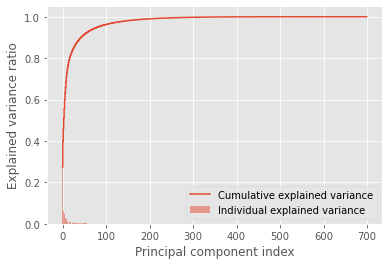

In [8]:
pca = PCA()
X_train_pca = pca.fit_transform(im_features)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


In [9]:
from sklearn import manifold, decomposition

# 1 - PCA 
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.9)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

# 2 - T-Sne 
from sklearn import manifold, decomposition
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
#df_tsne["class"] = mData_p1["Category"]
print(df_tsne.shape)

_time_()

Dimensions dataset avant réduction PCA :  (1048, 700)
Dimensions dataset après réduction PCA :  (1048, 44)
(1048, 2)
temps de traitement        12.89 minutes


In [10]:
print( 'TNSE - Image')
df_tsne

TNSE - Image


,tsne1,tsne2
0,-12.440010,21.075386
1,3.874655,-41.413559
2,-20.821356,8.433664
3,-26.129625,6.386205
4,-28.081547,-11.710289
...,...,...
1043,-3.154574,10.160899
1044,1.427474,-5.849862
1045,25.629892,22.901733
1046,-6.140348,24.798140


# Retire l'image Out du predict

In [11]:
mData_clus = mData_p1[["image","labels"]]
mData_clus = mData_clus.sort_values(by=['image'])
mData_clus = mData_clus[mData_clus.image != '9743e6d1c9f3180483825fe4d2e97836.jpg']
y  = pd.DataFrame(mData_clus.labels).reset_index()
y

,index,labels
0,280,6
1,86,5
2,723,4
3,819,1
4,423,2
...,...,...
1043,141,5
1044,706,4
1045,188,5
1046,811,4


# Regroupe Donnée + Target

In [12]:
X_ri = df_tsne.join(y)
X_ri.labels.value_counts()

6    150
5    150
4    150
3    150
1    150
2    149
0    149
Name: labels, dtype: int64

# Export

In [13]:
X_ri.to_csv('X_ri.csv', index=False) 

# Point trouvé f(x) des vrais Categories

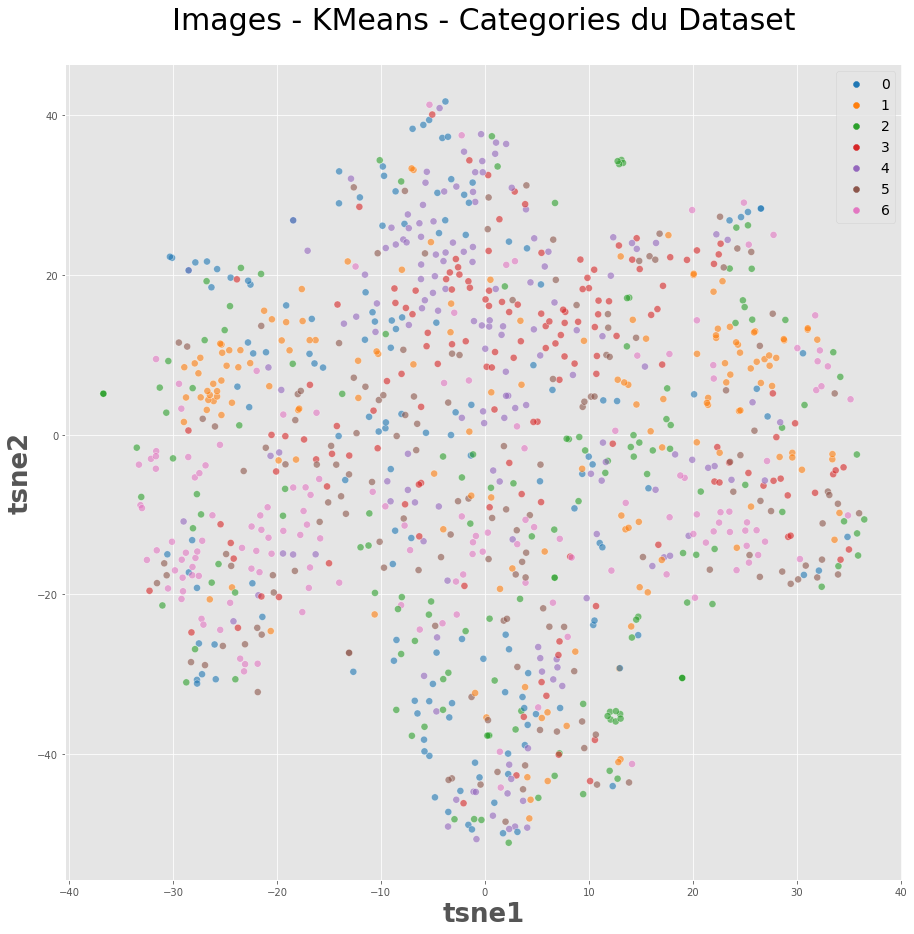

In [14]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels", data=X_ri, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('Images - KMeans - Categories du Dataset' , fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


# Graph Cluster Trouvé

In [15]:
from sklearn import cluster, metrics
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_ri)
X_ri["cluster"] = cls.labels_

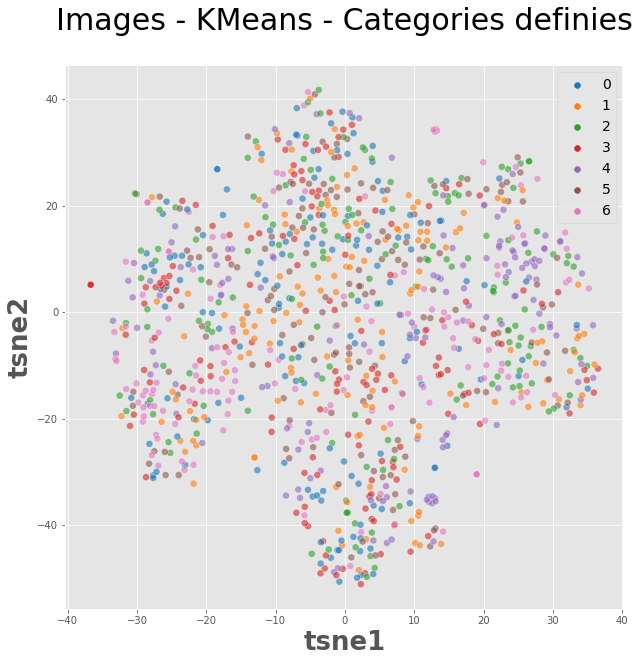

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=X_ri,
    legend="brief")

plt.title('Images - KMeans - Categories definies' , fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

# Score Classification non-supervisé

In [17]:
print("Kmeans - Accuracy Score -> ",accuracy_score(X_ri.cluster, X_ri.labels)*100)
print("Kmeans -  ARI : ", metrics.adjusted_rand_score(X_ri.cluster, X_ri.labels)*100)

Kmeans - Accuracy Score ->  15.839694656488549
Kmeans -  ARI :  15.391229397013358


In [18]:
print("==================================================")
print("Image - Kmeans - Accuracy -> ",round(accuracy_score(X_ri.cluster, X_ri.labels)*100))
print("==================================================")

Image - Kmeans - Accuracy ->  16.0


# Matrice de confusion

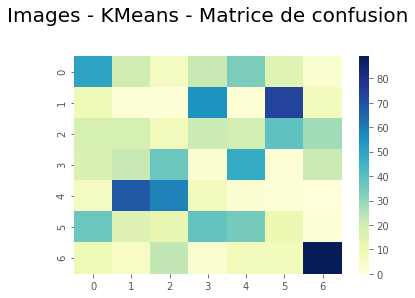

In [19]:
cm = confusion_matrix(X_ri.cluster, X_ri.labels)
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Images - KMeans - Matrice de confusion', fontsize = 20, pad = 35)
plt.show()

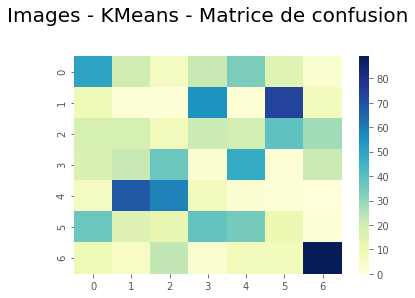

In [20]:
cm = confusion_matrix(X_ri.cluster, X_ri.labels)
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Images - KMeans - Matrice de confusion', fontsize = 20, pad = 35)
plt.show()

# -------- SUPERVISé ---------

# Naives

In [21]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X_ri[['tsne1', 'tsne2']],X_ri['labels'], test_size=0.3,random_state=21)


#MinMAx 
from sklearn.preprocessing import MinMaxScaler
X_train_n = MinMaxScaler().fit_transform(X_train)
X_test_n = MinMaxScaler().fit_transform(X_test)

from sklearn import model_selection, naive_bayes, svm

Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train_n ,y_train )
predictions_NB = Naive.predict(X_test)


print("==================================================")
print("Image - Naive B Accuracy -> ",round(accuracy_score(predictions_NB, y_test)*100))
print("==================================================")



Image - Naive B Accuracy ->  16.0


In [22]:
X_ri['labels'] 

0       6
1       5
2       4
3       1
4       2
       ..
1043    5
1044    4
1045    5
1046    4
1047    2
Name: labels, Length: 1048, dtype: int64

In [23]:
# Total pour graph

#MinMAx 
from sklearn.preprocessing import MinMaxScaler
X__n = MinMaxScaler().fit_transform(X_ri[['tsne1', 'tsne2']])

from sklearn import model_selection, naive_bayes, svm

Naive = naive_bayes.MultinomialNB()
Naive.fit(X__n ,X_ri['labels'] )
predictions_NB = Naive.predict(X__n)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, X_ri['labels'])*100)




Naive Bayes Accuracy Score ->  17.84351145038168


In [24]:
a = pd.DataFrame(predictions_NB)
a[0].value_counts()


4    509
2    291
5    174
1     44
3     23
6      7
Name: 0, dtype: int64

In [25]:
print (509 + 291+ 174 +  44 + 23 + 7)

1048


In [26]:
y_pred_n = pd.DataFrame(predictions_NB)
X_final_n = X_ri.join(y_pred_n)
X_final_n  = X_final_n.rename(columns={0: "Naive_class"})
X_final_n

,tsne1,tsne2,index,labels,cluster,Naive_class
0,-12.440010,21.075386,280,6,1,4
1,3.874655,-41.413559,86,5,2,2
2,-20.821356,8.433664,723,4,0,4
3,-26.129625,6.386205,819,1,3,4
4,-28.081547,-11.710289,423,2,4,4
...,...,...,...,...,...,...
1043,-3.154574,10.160899,141,5,2,4
1044,1.427474,-5.849862,706,4,0,5
1045,25.629892,22.901733,188,5,1,5
1046,-6.140348,24.798140,811,4,3,4


In [27]:
a = X_final_n.Naive_class
a.value_counts()

4    509
2    291
5    174
1     44
3     23
6      7
Name: Naive_class, dtype: int64

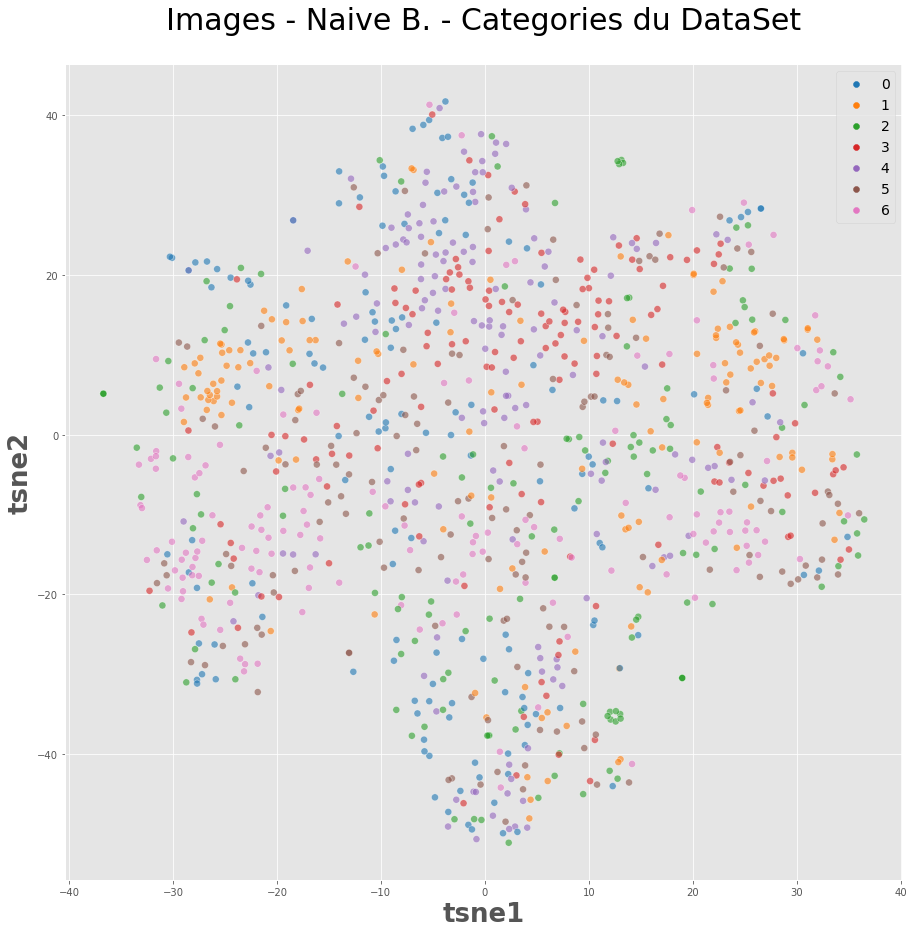

In [28]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels", data=X_final_n, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('Images - Naive B. - Categories du DataSet', fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


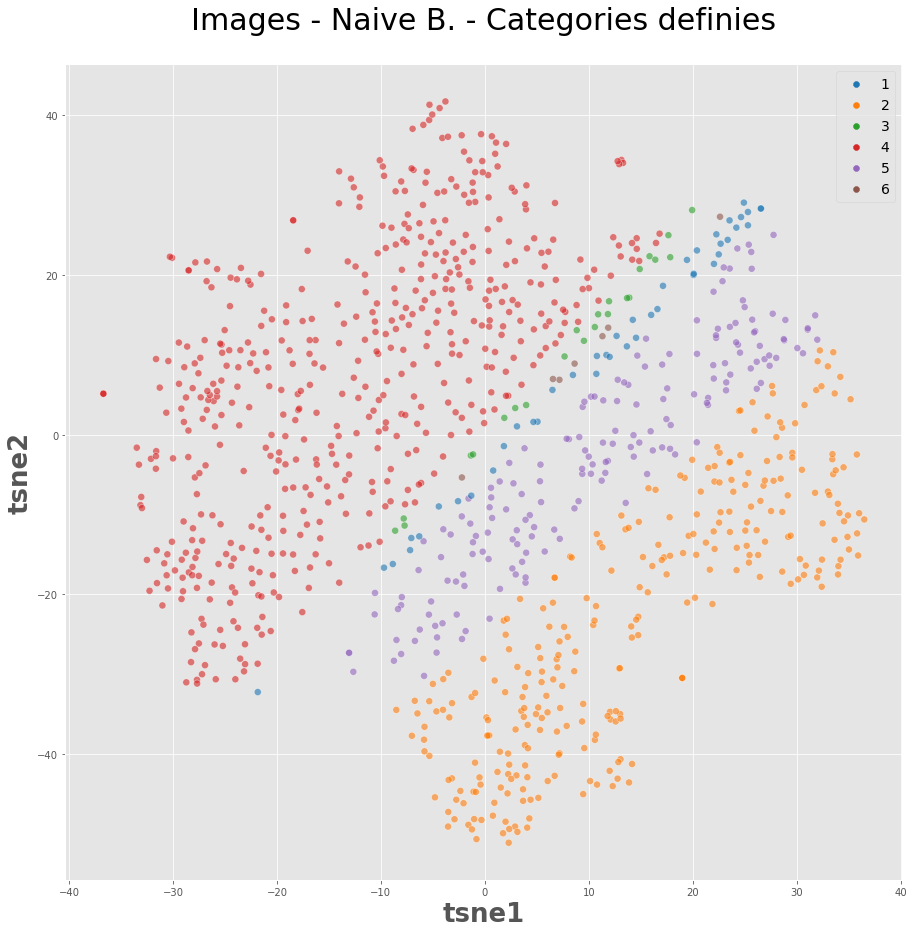

In [29]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="Naive_class", data=X_final_n, legend="brief",
    palette=sns.color_palette('tab10', n_colors=6), s=50, alpha=0.6)

plt.title('Images - Naive B. - Categories definies', fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


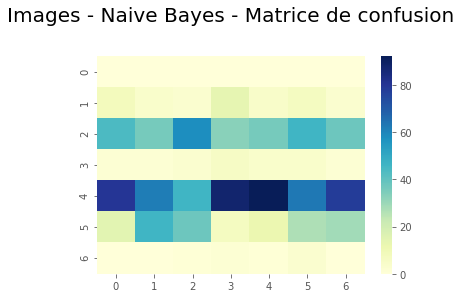

In [30]:
cm = confusion_matrix(X_final_n['Naive_class'], X_final_n['labels'])
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Images - Naive Bayes - Matrice de confusion', fontsize = 20, pad = 35)
plt.show()

# SVM par defaut

In [31]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X_ri[['tsne1', 'tsne2']],X_ri['labels'], test_size=0.3,random_state=21)


# W/ default hyperparameters

svc=SVC() 
svc.fit(X_train,y_train)

# predict 
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("ARI : ", metrics.adjusted_rand_score(y_test,y_pred))

Model accuracy score with default hyperparameters: 0.3492
ARI :  0.07688960605707731


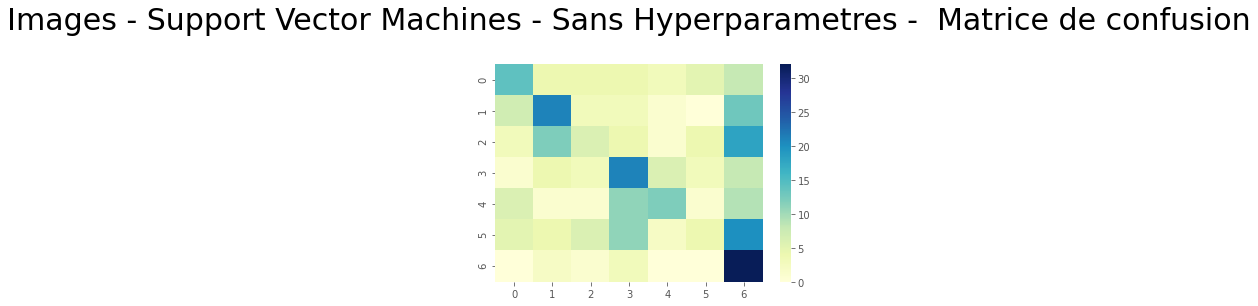

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Images - Support Vector Machines - Sans Hyperparametres -  Matrice de confusion', fontsize = 30, pad = 35)
plt.show()

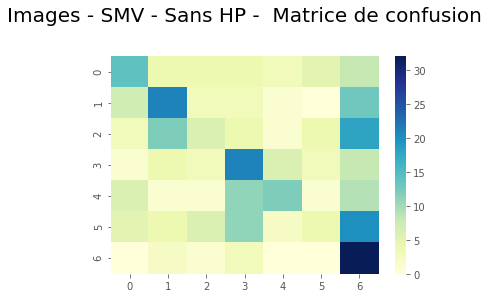

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Images - SMV - Sans HP -  Matrice de confusion', fontsize = 20, pad = 35)
plt.show()

# SVM cherche HP

In [34]:
parameters = {'C': [1, 10], 
          'gamma': [0.001, 0.01, 1]}
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=parameters,verbose=2)
grid.fit(X_train,y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END .......................................C=1, gamma=1; total time=   0.0s
[CV] END .......................................C

# Final Score

In [35]:

X_train, X_test, y_train, y_test = train_test_split(X_ri[['tsne1', 'tsne2']],X_ri['labels'], test_size=0.3,random_state=21)

svc=SVC(C=1, gamma=0.01) 
svc.fit(X_train,y_train)

# predict 
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("ARI : ", metrics.adjusted_rand_score(y_test,y_pred))

Model accuracy score with default hyperparameters: 0.3619
ARI :  0.08894365140385312


In [36]:
print("==================================================")
print("Image - SVM - Accuracy -> ",round(accuracy_score(y_test, y_pred)*100))
print("==================================================")

Image - SVM - Accuracy ->  36.0


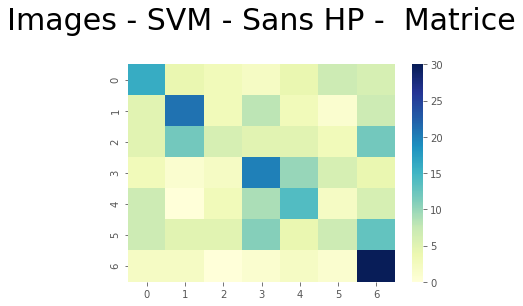

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Images - SVM - Sans HP -  Matrice', fontsize = 30, pad = 35)
plt.show()

# Preuve en image

In [38]:
svc=SVC(C=10, gamma=0.01) 
svc.fit(X_ri[['tsne1', 'tsne2']],X_ri['labels'])

# predict 
y_pred=svc.predict(X_ri[['tsne1', 'tsne2']])



In [39]:
y_pred = pd.DataFrame(y_pred)
X_final = X_ri.join(y_pred)
X_final  = X_final.rename(columns={0: "SVM_class"})
X_final

,tsne1,tsne2,index,labels,cluster,SVM_class
0,-12.440010,21.075386,280,6,1,4
1,3.874655,-41.413559,86,5,2,0
2,-20.821356,8.433664,723,4,0,1
3,-26.129625,6.386205,819,1,3,1
4,-28.081547,-11.710289,423,2,4,6
...,...,...,...,...,...,...
1043,-3.154574,10.160899,141,5,2,3
1044,1.427474,-5.849862,706,4,0,2
1045,25.629892,22.901733,188,5,1,2
1046,-6.140348,24.798140,811,4,3,4


In [40]:
# Reel

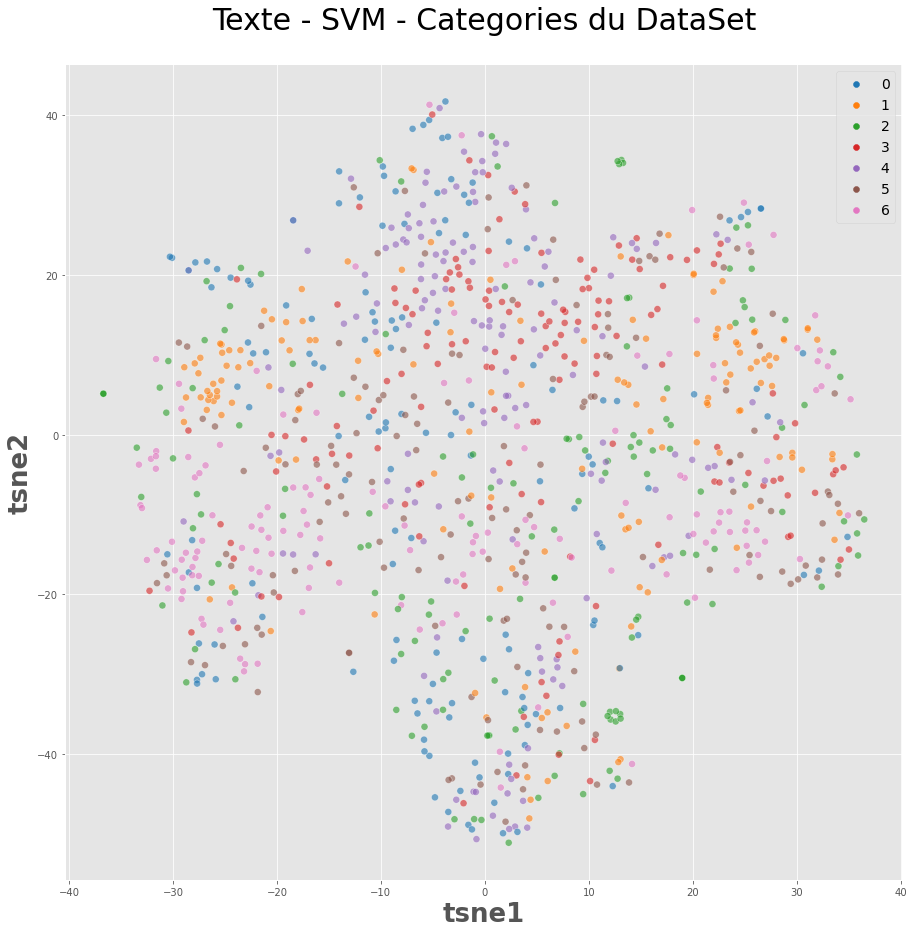

In [41]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels", data=X_final, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('Texte - SVM - Categories du DataSet', fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


In [42]:
# Defini 

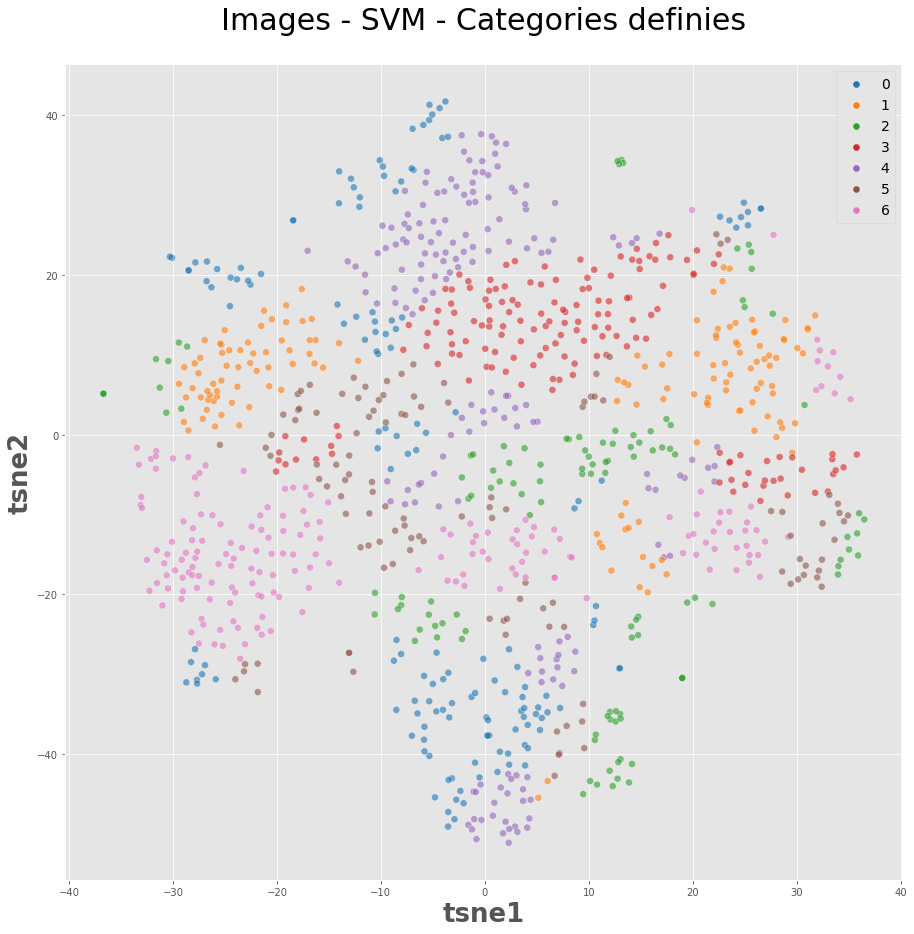

In [43]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="SVM_class", data=X_final, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('Images - SVM - Categories definies', fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()